**CENSUS INCOME CATEGORY** 
---

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report , roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Projects/CENSUS INCOME CATEGORY PREDICTION/Data.csv')

In [3]:
# let's look into data
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


---
**About features of the dataset**

Age: This is the age of the individual in years.

Workclass: This feature indicates the individual's type of employment, such as private, self-employed, government, etc.

Education: This feature indicates the highest level of education the individual has achieved, such as high school, college, or graduate school.

Education-Num: This feature is a numerical representation of the Education feature.

Marital Status: This feature indicates the individual's marital status, such as married, divorced, or never married.

Occupation: This feature indicates the individual's occupation, such as executive, administrative, or sales.

Relationship: This feature indicates the individual's relationship status, such as husband, wife, or unmarried.

Race: This feature indicates the individual's race, such as White, Black, or Asian.

Sex: This feature indicates the individual's gender, either male or female.

Capital Gain: This feature indicates the capital gain of the individual, which refers to the profit they made from selling assets such as stocks or real estate.

Capital Loss: This feature indicates the capital loss of the individual, which refers to the loss they incurred from selling assets such as stocks or real estate.

fnlwgt - It refers to the final weight, which is a value assigned to each observation in the dataset.

Hours per week: This feature indicates the number of hours the individual works per week.

Native Country: This feature indicates the individual's country of origin.

Income: This is the target variable, indicating whether the individual's income exceeds $50,000 per year (represented as ">50K") or not (represented as "<=50K").

In [4]:
# info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# shape of the data
data.shape

(32561, 15)

In [6]:
# statistical analysis
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# null values in tha dataset
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
data.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [9]:
# unique values
data.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

**About the columns:**

Binary Categorigal Features: Sex, Income(target variable)

Multi Categorigal Features: workclass, marital.status, relationship, occupation, race, education, education.num

Continuous Feature: age, fnlwgt, capital.gain, capital.loss, hours.per.week, native.country

Target Feature: income

---
**EDA**

<Axes: xlabel='age', ylabel='Count'>

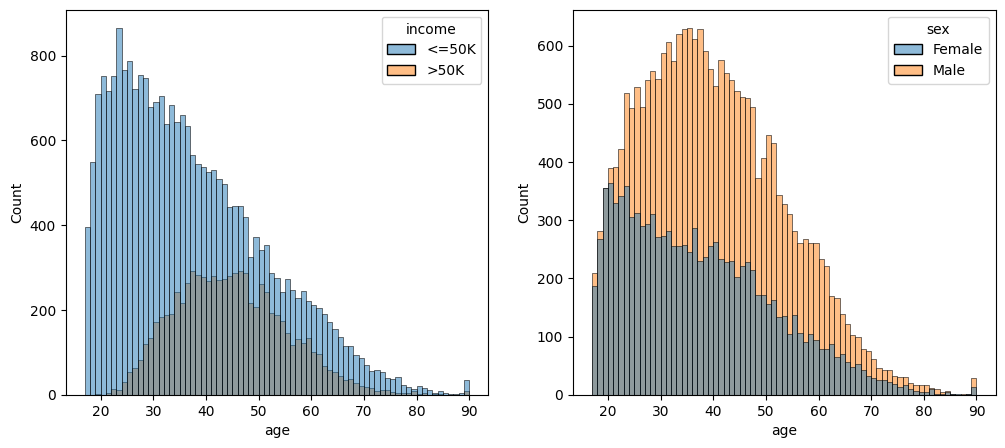

In [10]:
# plotting age on bar plot with respect income
fig = plt.figure(figsize=(12,5))
fig.add_subplot(121)
sns.histplot(x=data['age'],bins=73, hue=data['income'])
# plotting age on bar plot with respect sex column
fig.add_subplot(122)
sns.histplot(x=data['age'],bins=73, hue=data['sex'])






* If we compare age with income column then we can say that people with income greater that 50k are of between age 30 to 60 and avarage people's have income less than 50k.
*  From age column with sex distribution we can see that counts of female is much less than that of male.


* And after the age of 60 there are not much people who are earning
---





<Axes: xlabel='capital.loss', ylabel='Count'>

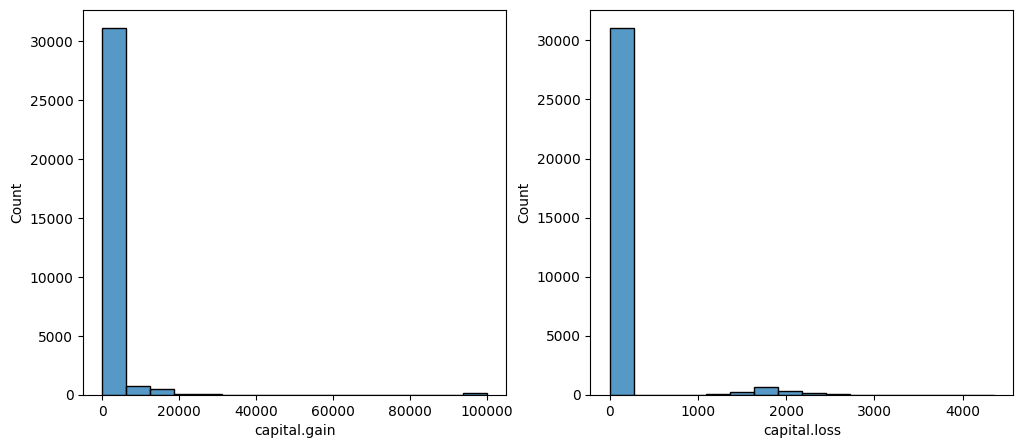

In [11]:
# plotting capital.gain on hist plot
fig = plt.figure(figsize=(12,5))
fig.add_subplot(121)
sns.histplot(x=data['capital.gain'])
# plotting capital.loss on hist plot
fig.add_subplot(122)
sns.histplot(x=data['capital.loss'])

If we see above plot we can say that almost near 30000 people gained and lossed 0 amount which means they did not have any profit or loss.

---

<Axes: xlabel='age', ylabel='hours.per.week'>

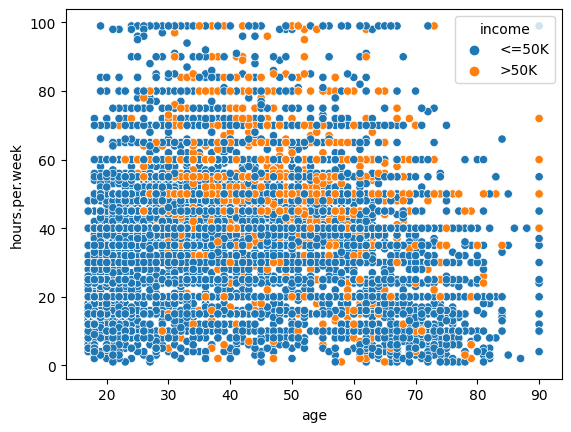

In [12]:
# plotting hours.per.week with age and comparing with respecting to income
sns.scatterplot(data=data, y='hours.per.week', x='age', hue='income')

People who are working above 40 hours have more income but there are peoples who are working for less than 40 hours but have high income

---

<Axes: xlabel='race', ylabel='count'>

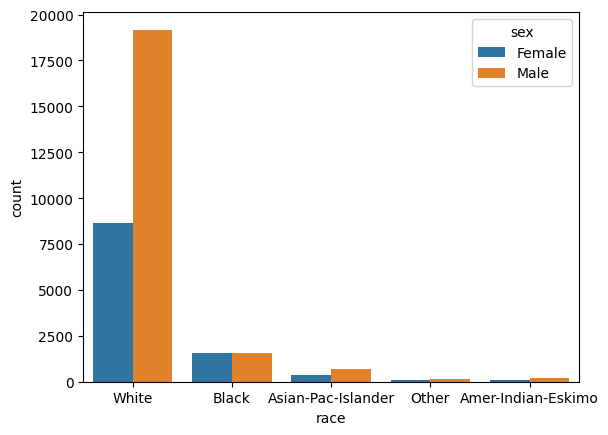

In [13]:
# checking the race of the working people's
sns.countplot(data=data, x='race', hue='sex')

Number of males are more compare to female and most of them are white.

---

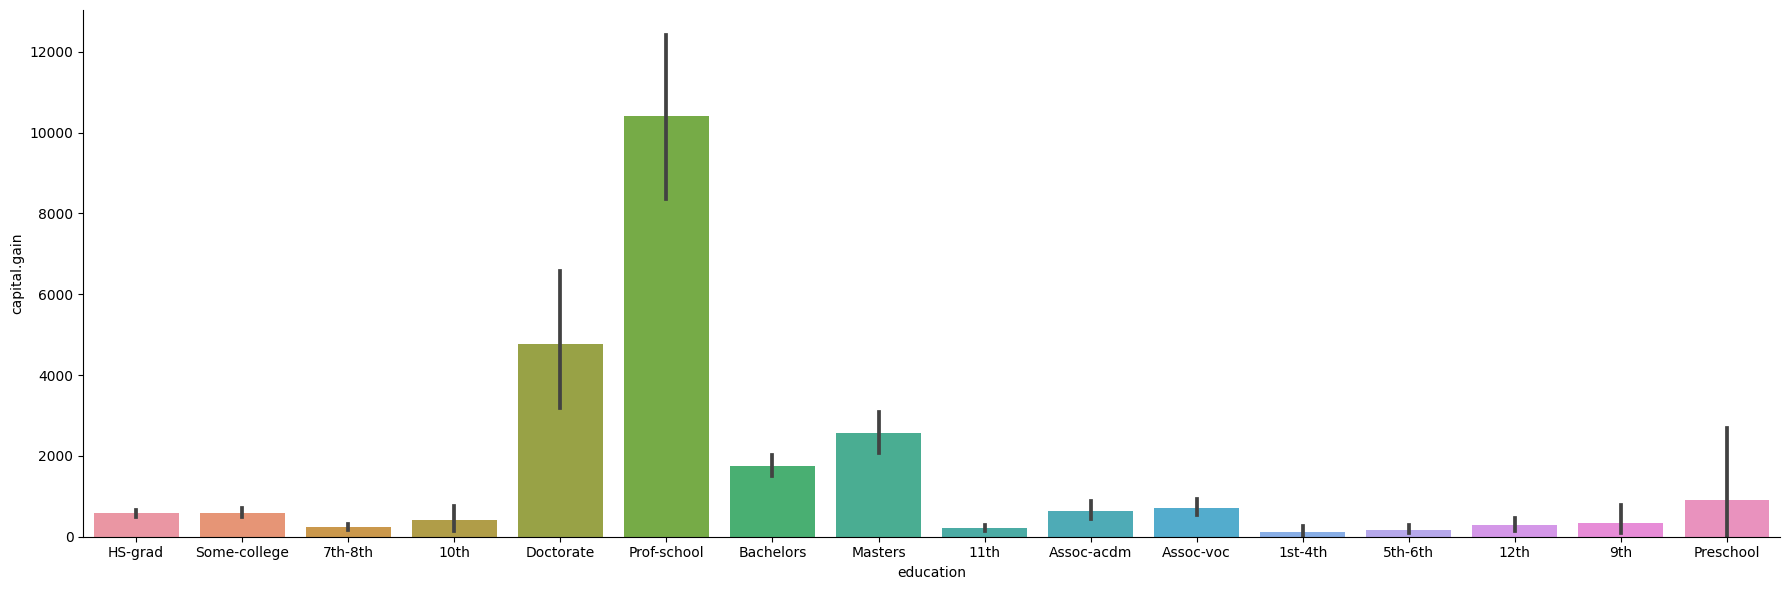

In [14]:
# comparing capital.gain with education to see who is earning more
sns.catplot(data=data, x='education', y='capital.gain', kind="bar", height=6, aspect=3)

Professor at school have highest capital gain and after that doctorate and Masters but Prof-school is dominating all other classes.

---

<Axes: xlabel='workclass', ylabel='count'>

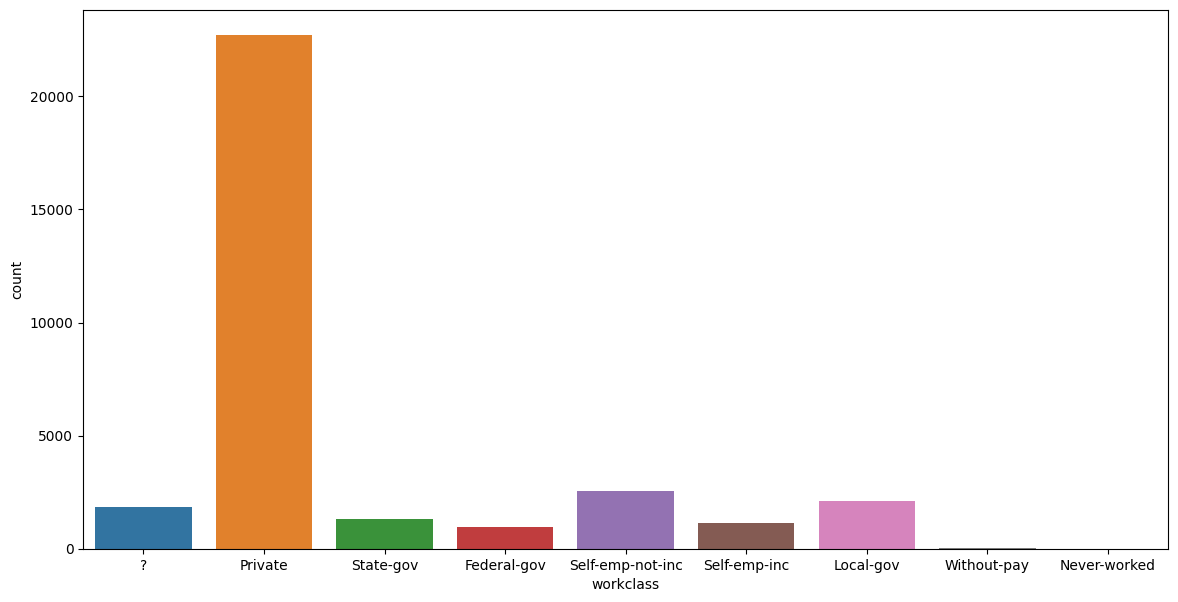

In [15]:
# count of people's workclass
plt.figure(figsize=(14,7))
sns.countplot(data=data, x='workclass')

Over 20000 people's are from Private and other are even below 3000.

---

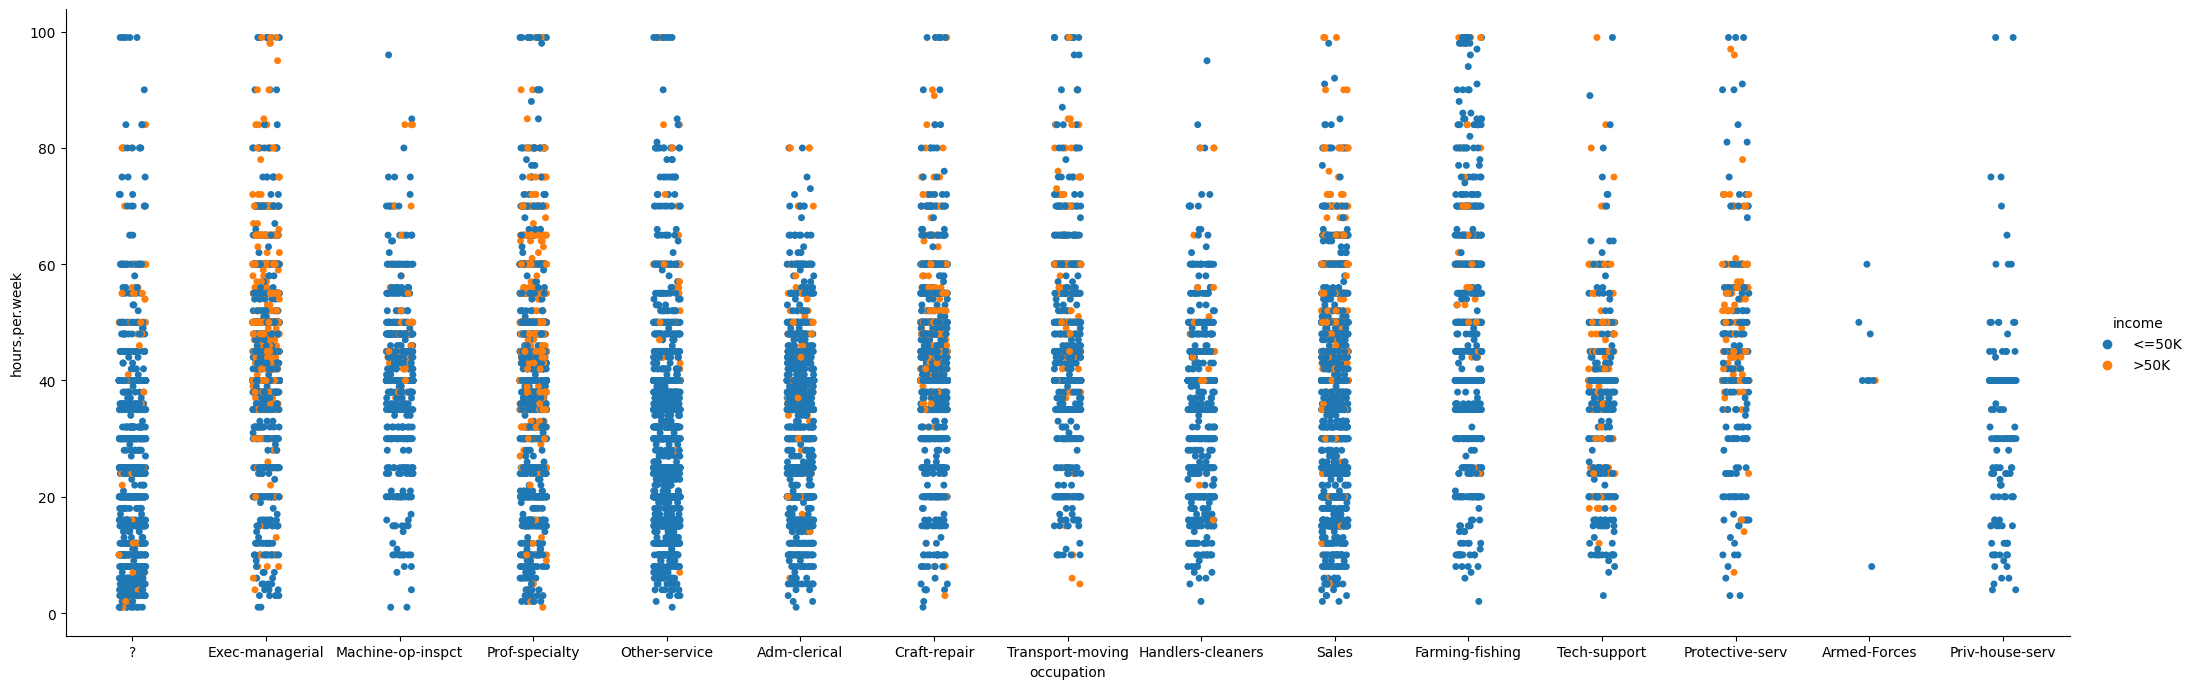

In [16]:
# who is earning more with respect to work.hours
sns.catplot(data=data, x='occupation', y='hours.per.week', kind="strip", height=7, aspect=3, hue='income')

There are many Exec-managers and Professors who are working for less than 40 hours but have income more than 50k.

---

<Axes: xlabel='income', ylabel='count'>

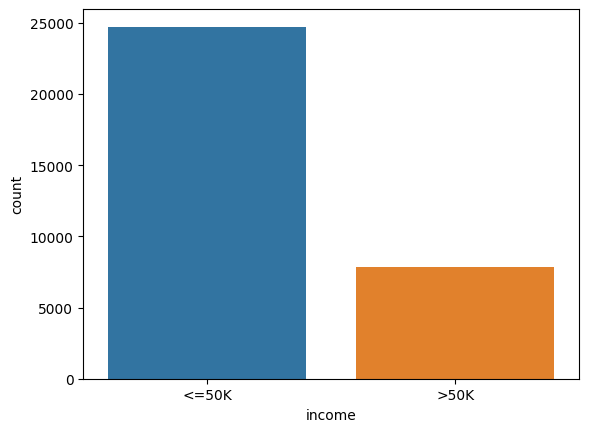

In [17]:
sns.countplot(data=data, x='income')

We can say that our target column data is imbalanced.

---




*   **Data Cleaning and Preprocessing** 





In [18]:
# as there are string values'?' in occupation and workclass column
data[data['occupation'] == '?']['income'].value_counts()

<=50K    1652
>50K      191
Name: income, dtype: int64

In [19]:
data[data['workclass'] == '?']['income'].value_counts()

<=50K    1645
>50K      191
Name: income, dtype: int64

In [20]:
# i am assigning '?' this value to unknown as no. of values '?' is greater so i'll replace them from both occupation and workclass column
data.loc[data['occupation'] == '?', 'occupation'] = 'unknown'
data.loc[data['workclass'] == '?', 'workclass'] = 'unknown'

**Handling Outliers**

In [21]:
num_col = data[['age', 'capital.gain', 'capital.loss', 'hours.per.week','education.num']]

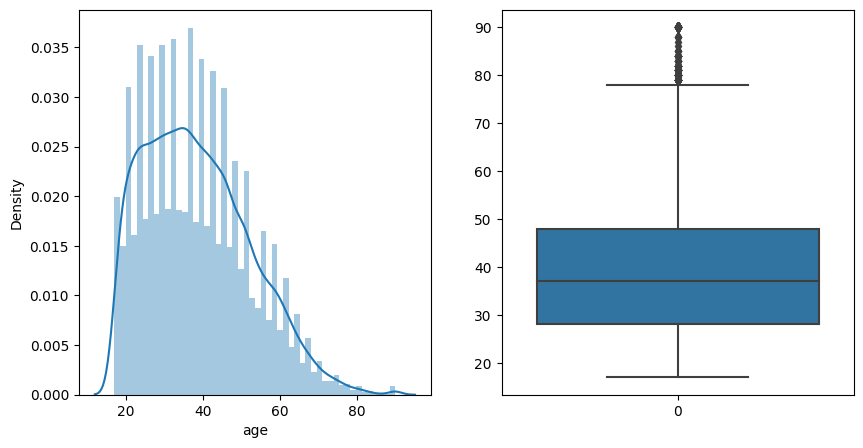

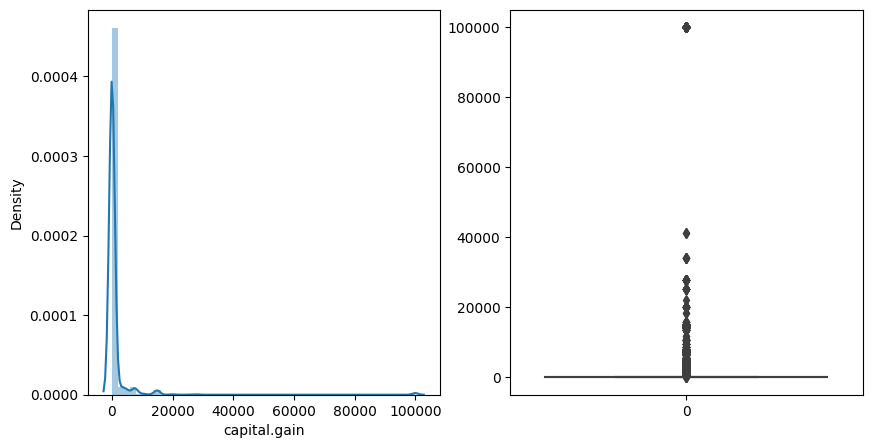

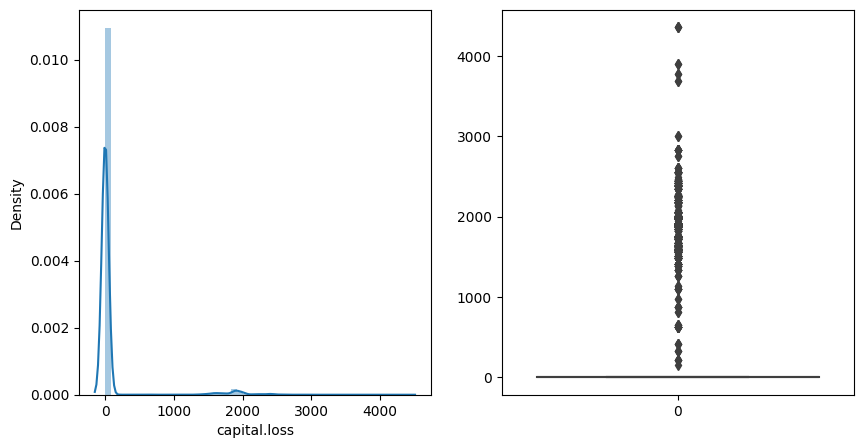

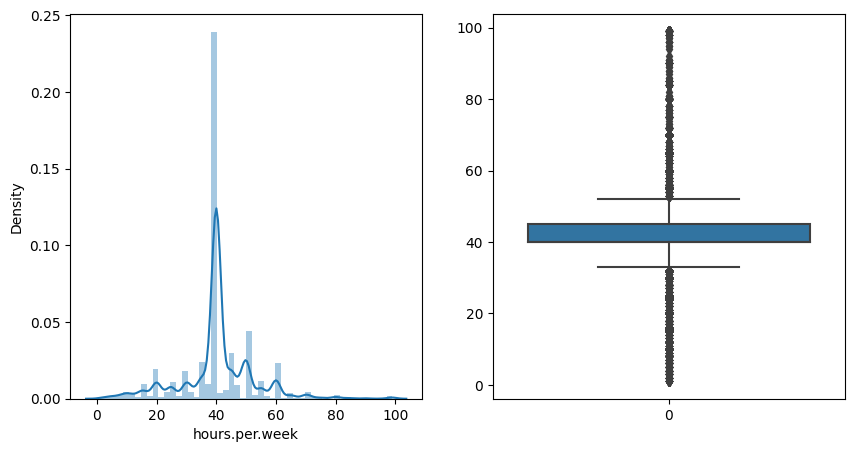

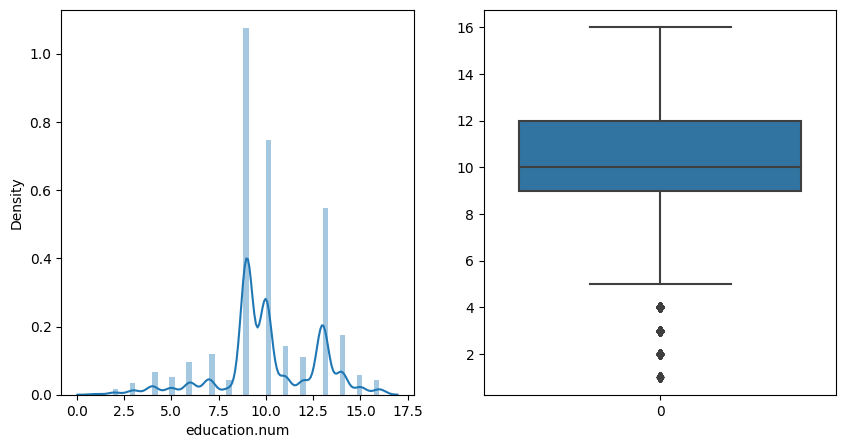

In [22]:
for col in num_col.columns:
  fig = plt.figure(figsize=(10,5))
  fig.add_subplot(121)
  sns.distplot(num_col[col])

  fig.add_subplot(122)
  sns.boxplot(num_col[col])



*   Capital.loss, Capital.gain skwed and the data is already dominated by a single value so considering any outliers will not be an appropriate method.
*   In hours.per.week column every hour is important so it's good as it is.

*  Removing outliers from age and education.num column as there are not much outliers so information loss will be less.


In [23]:
# using z-score method to remove outliers from age column
upper_limit = data['age'].mean() + 3*data['age'].std()
lower_limit = data['age'].mean() - 3*data['age'].std()
print('upper_limit:',upper_limit)
print('lower_limit:',lower_limit)

upper_limit: 79.50294441606482
lower_limit: -2.339650905423248


In [24]:
# from outlier how many are above 50k and below it
data[data['age'] > upper_limit]['income'].value_counts()

<=50K    105
>50K      16
Name: income, dtype: int64

In [25]:
# trimming these outliers
data = data.drop(data[data['age'] > upper_limit].index)

In [26]:
# taking care of outlier's from education.num column with IQR method
percentile25 = data['education.num'].quantile(0.25)
percentile75 = data['education.num'].quantile(0.75)

In [27]:
# calculating IQR
IQR = percentile75 - percentile25
print('IQR:',IQR)

IQR: 3.0


In [28]:
# calculating upper and lower limit
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR
print('upper_limit:',upper_limit)
print('lower_limit:',lower_limit)

upper_limit: 16.5
lower_limit: 4.5


In [29]:
# how many values exceed upper and lower limit from education.num column
print('exceeding lower limit',data[data['education.num'] < lower_limit].shape)
print('exceeding upper limit',data[data['education.num'] > upper_limit].shape)

exceeding lower limit (1179, 15)
exceeding upper limit (0, 15)


In [30]:
# there are no values exceeding upper limit
# trimming these outliers
data = data.drop(data[data['education.num'] < lower_limit].index)

---
**Data Encoding**

In [31]:
# encoding all the object based columns using column transformer
cf = ColumnTransformer(transformers=[
    ('tf1', OrdinalEncoder(), ['workclass','education','marital.status','occupation','relationship','race','sex','native.country']),
    ], remainder='passthrough')

In [32]:
# if we use column transformer and directly fit it all the columns will shuffle so i am using column_selector to solve this problem
column_selector = make_column_selector(dtype_include = object)
# applying column_selector object on the data 
categorical_col = column_selector(data)
# selecting only the columns in data that are in the categorical
data_categorical = data[categorical_col]

In [33]:
# fitting column transformer to new categorical feature dataframe
data_cat = cf.fit_transform(data_categorical)

In [34]:
# converting it to dataframe
cat_df = pd.DataFrame(data_cat, columns=data_categorical.columns)

In [35]:
# dropping all categorical columns from original dataset and craeting new dataset
df = data.drop(columns=cat_df.columns)

df.reset_index(drop=True, inplace=True)
cat_df.reset_index(drop=True, inplace=True)
# concatenating this new dataset to new cat_df
new_data = pd.concat([df,cat_df], axis=1)

In [36]:
# as income column is still a object so changing it to numerical
le = LabelEncoder()
data['income'] = le.fit_transform(data['income'])

---



*   **Model Training**



In [37]:
# splitting data into X and y
X = new_data.drop(columns='income')
y = data.income

In [38]:
# applying train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=11)

In [39]:
# creating DTC object and fitting it to training data
model = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth = 5)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [40]:
# prediction
pred = model.predict(X_test)

In [41]:
# test data accuracy
print(accuracy_score(y_test, pred))

0.8396417528521164


In [42]:
# train data accuracy
model.score(X_train, y_train)

0.8449867470980714

In [43]:
# confusion matrix
print(confusion_matrix(y_test, pred))

[[6639  350]
 [1154 1236]]


In [44]:
# classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      6989
           1       0.78      0.52      0.62      2390

    accuracy                           0.84      9379
   macro avg       0.82      0.73      0.76      9379
weighted avg       0.83      0.84      0.83      9379



In [45]:
# creating KFold and fitting it to the data
kf = KFold(n_splits=5, shuffle=True, random_state=11)
score = cross_val_score(model, X,y, cv=kf)
print(score)

[0.8347993  0.85236724 0.85172745 0.837492   0.85316699]


In [46]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

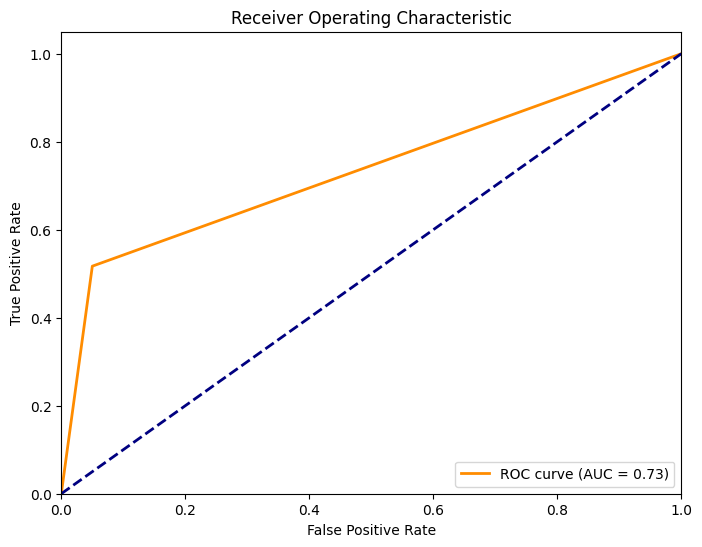

In [47]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

---
**Using RandomizedSearchCV**

In [48]:
# setting up parameters
hyperparameters =  {
    'max_depth': np.arange(1, 21),
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy','log_loss'],
    'max_leaf_nodes': [None, 5, 10, 20],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3]
}

In [49]:
# creating a DTC model
model1 = DecisionTreeClassifier()

In [50]:
# creating random_search object and fitting it to the data
random_search = RandomizedSearchCV(model1, hyperparameters, n_iter=50)
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [None, 5, 10, 20],
                                        'min_impurity_decrease': [0.0, 0.1, 0.2,
                                                                  0.3],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])})

In [51]:
# best hyperparameters with score
best_hyperparams = random_search.best_params_
best_score = random_search.best_score_
print(best_hyperparams)
print(best_score)

{'min_samples_split': 16, 'min_samples_leaf': 9, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'max_features': None, 'max_depth': 7, 'criterion': 'gini'}
0.8513390379075598


In [53]:
# creating DTC with new hyperparameters
model2 = DecisionTreeClassifier(min_samples_split = 9, min_samples_leaf = 3, min_impurity_decrease = 0.0, max_leaf_nodes = 20, max_features = None, max_depth = 15, criterion = 'gini')

In [54]:
# fitting data on new model
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=20, min_samples_leaf=3,
                       min_samples_split=9)

In [55]:
# prediction
pred2 = model2.predict(X_test)

In [56]:
# accuracy score of test data
accuracy_score(y_test, pred2)

0.8475317197995522

In [57]:
# accuracy of train data
model2.score(X_train, y_train)

0.8520244950187369

In [58]:
# confusion matrix
print(confusion_matrix(y_test, pred2))

[[6670  319]
 [1111 1279]]


In [59]:
# classification report
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6989
           1       0.80      0.54      0.64      2390

    accuracy                           0.85      9379
   macro avg       0.83      0.74      0.77      9379
weighted avg       0.84      0.85      0.84      9379



In [60]:
kf = KFold(n_splits=5, shuffle=True, random_state=11)
score = cross_val_score(model2, X,y, cv=kf)
print(score)

[0.84343515 0.85412668 0.85060781 0.84788868 0.85316699]


In [61]:
fpr, tpr, thresholds = roc_curve(y_test, pred2)
roc_auc = auc(fpr, tpr)

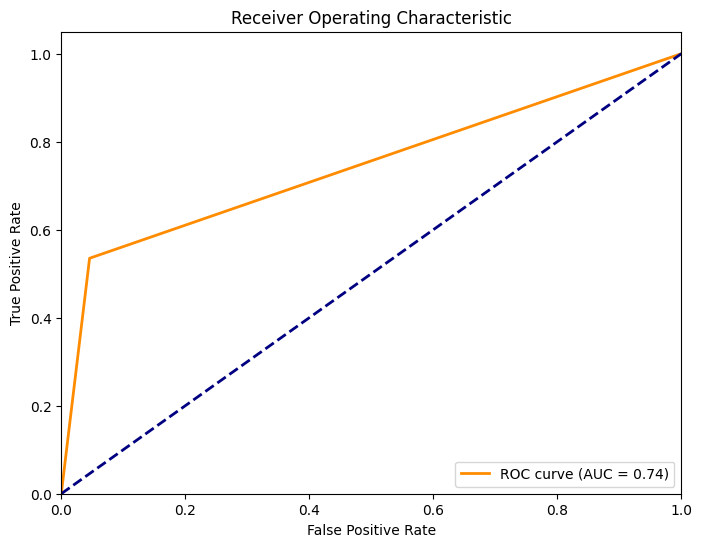

In [62]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


---
*   **TRAINING MODEL USING SMOTE**

SMOTE (Synthetic Minority Over-sampling Technique) is a popular oversampling algorithm used to address class imbalance in machine learning datasets.

In [63]:
# Importing and creating a smote object
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=11)

In [64]:
# new sampled data
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [65]:
# fitting the model
model2.fit(X_resampled, y_resampled)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=20, min_samples_leaf=3,
                       min_samples_split=9)

In [66]:
# prediction
pred10 = model2.predict(X_test)

In [67]:
print(accuracy_score(y_test, pred10))

0.8239684401322103


In [68]:
print(confusion_matrix(y_test, pred10))

[[6120  869]
 [ 782 1608]]


In [69]:
print(classification_report(y_test, pred10))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      6989
           1       0.65      0.67      0.66      2390

    accuracy                           0.82      9379
   macro avg       0.77      0.77      0.77      9379
weighted avg       0.83      0.82      0.82      9379



In [70]:
fpr, tpr, thresholds = roc_curve(y_test, pred10)
roc_auc = auc(fpr, tpr)

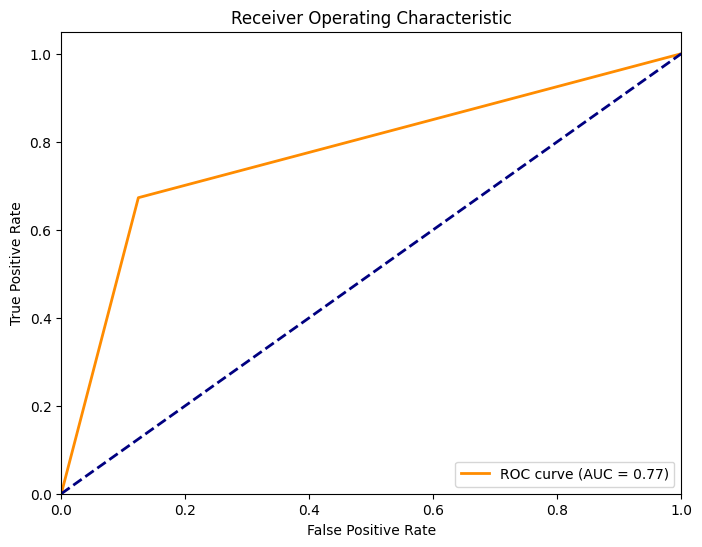

In [71]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()